<a href="https://colab.research.google.com/github/yoo-jaein/KNU-DeepLearning/blob/master/DAY2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

with open('/content/gdrive/My Drive/Colab Notebooks/fwtest.txt', 'w') as f:
  f.write('Hello Google Drive!')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
import numpy as np
sess = tf.Session()

row_dim = 2
col_dim = 3
zero_tsr = tf.zeros([row_dim, col_dim])
ones_tsr = tf.ones([row_dim, col_dim])
filed_tsr = tf.fill([row_dim, col_dim], 42)
constant_tsr = tf.constant([1,2,3])
print(zero_tsr, '\n', ones_tsr, '\n', constant_tsr, '\n')


Tensor("zeros_1:0", shape=(2, 3), dtype=float32) 
 Tensor("ones_1:0", shape=(2, 3), dtype=float32) 
 Tensor("Const:0", shape=(3,), dtype=int32) 



In [0]:
# 최소와 최대 사이의 값이 나옴
r = tf.random_uniform([row_dim, col_dim], minval=0, maxval=1)
print(sess.run(r))

# 대충 값이 맞지만 가끔 범위 밖의 값이 나옴
r = tf.random_normal([row_dim, col_dim], mean=0.0, stddev=0.1)
print(sess.run(r))

# 어떤 범위에 반드시 들어가야 하는 경우
r = tf.truncated_normal([row_dim, col_dim], mean=0.0, stddev=1.0)
print(sess.run(r))

[[0.05002379 0.28603458 0.47077072]
 [0.02426314 0.41778374 0.20330763]]
[[ 0.00287951  0.00281896 -0.08653779]
 [ 0.20608492  0.05877924  0.03286822]]
[[-0.13442159 -1.5198      0.7112956 ]
 [-0.29887295 -0.0181323  -0.05184649]]


In [0]:
# Variable로 선언해줄 경우 반드시 초기화해야 사용 가능
var = tf.Variable(tf.zeros([2,3]))
sess.run(var.initializer)
print(sess.run(var))

# Placeholder는 변하지 않는 값을 가지고 있는 변수
# 아직 값은 들어있지 않지만 미리 셋업함
x = tf.placeholder(tf.float32, shape=[2,2])
# x를 y에 복사함
y = tf.identity(x)
x_vals = np.random.rand(2,2)
# placeholder x에 x_vals를 넣는 방법
sess.run(y, feed_dict={x: x_vals})

[[0. 0. 0.]
 [0. 0. 0.]]


array([[0.94100934, 0.5807559 ],
       [0.46932808, 0.8893119 ]], dtype=float32)

In [0]:
import math as m

my_var = tf.Variable(tf.zeros([2,3]))
init_op = tf.global_variables_initializer()
sess.run(init_op)
print(sess.run(my_var))

first_var = tf.Variable(tf.ones([2,3]))
sess.run(first_var.initializer)
print(sess.run(first_var))

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]]


In [0]:
identity_matrix = tf.diag([1.0, 1.0, 1.0])
A = tf.truncated_normal([2,3])
B = tf.fill([2,3], 5.0)
C = tf.random_uniform([3,2])

print(sess.run(identity_matrix))
print(sess.run(A))
print(sess.run(B))
print(sess.run(C))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-0.4373338   0.80445695  1.4930702 ]
 [ 0.27584556 -0.08421466  0.8345801 ]]
[[5. 5. 5.]
 [5. 5. 5.]]
[[0.8725312  0.85109746]
 [0.37555456 0.13634753]
 [0.01241684 0.534768  ]]


In [0]:
print(sess.run(tf.div(3,4)))
print(sess.run(tf.truediv(3,4)))
print(sess.run(tf.floordiv(3.0,4.0)))

0
0.75
0.0


In [0]:
def my_circle(r):
  return((m.pi*(r*r)))

# 리턴값(float)으로 치환되므로 print(sess.run(my_circle(10)))으로 사용하면 안됨
# sess.run()의 인자는 tensor만 가능함
print(my_circle(10))
print(sess.run(tf.cast(my_circle(10),tf.float32)))

314.1592653589793
314.15927


Tensor("LinSpace_5:0", shape=(15,), dtype=float32)
[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


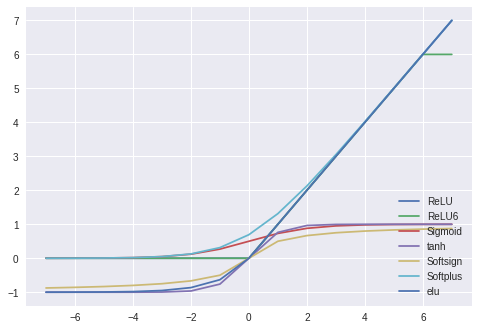

In [0]:
import matplotlib.pyplot as plt
import tensorflow.nn as nn

x = tf.linspace(start=-7.0, stop=7.0, num=15)
print(x)
print(sess.run(x))

y1 = nn.relu(x)
plt.plot(sess.run(x), sess.run(y1), label='ReLU')

y2 = nn.relu6(x)
plt.plot(sess.run(x), sess.run(y2), label='ReLU6')

y3 = nn.sigmoid(x)
plt.plot(sess.run(x), sess.run(y3), label='Sigmoid')

y4 = nn.tanh(x)
plt.plot(sess.run(x), sess.run(y4), label='tanh')

y5 = nn.softsign(x)
plt.plot(sess.run(x), sess.run(y5), label='Softsign')

y6 = nn.softplus(x)
plt.plot(sess.run(x), sess.run(y6), label='Softplus')

y7 = nn.elu(x)
plt.plot(sess.run(x), sess.run(y7), label='elu')

plt.legend(loc='lower right')

In [0]:
# Layering Nested Operations
# Placeholder -(const)> Matmul -(const_1)> Matmul1 -(const_2)> Add
my_array = np.array([[1., 3., 5., 7., 9.], [-2., 0., 2., 4., 6.], [-6., -3., 0., 3., 6.]])
x_vals = np.array([my_array, my_array+1])
print(x_vals)

x_data = tf.placeholder(tf.float32, shape = np.shape(my_array)) # 3 X 5

m1 = tf.constant([[1.],[0.],[-1.],[2.],[4]]) # 5 X 1
m2 = tf.constant([[2.]]) # 1 X 1
a1 = tf.constant([[10.]]) # 1 X 1

prod1 = tf.matmul(x_data, m1)
prod2 = tf.matmul(prod1, m2)
add1 = tf.add(prod2, a1)

for x_val in x_vals:
  print(sess.run(add1, feed_dict = {x_data:x_val})) # 3 X 2

[[[ 1.  3.  5.  7.  9.]
  [-2.  0.  2.  4.  6.]
  [-6. -3.  0.  3.  6.]]

 [[ 2.  4.  6.  8. 10.]
  [-1.  1.  3.  5.  7.]
  [-5. -2.  1.  4.  7.]]]
[[102.]
 [ 66.]
 [ 58.]]
[[114.]
 [ 78.]
 [ 70.]]


In [0]:
# classification loss for multiple classes
# softmax cross-entropy loss
unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
softmax_xentropy = tf.nn.softmax_cross_entropy_with_logits(labels=target_dist, logits=unscaled_logits)
print(sess.run(softmax_xentropy))

# sparse softmax cross-entropy loss (one-hot version --> label output)
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([1])
sparse_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=sparse_target_dist, logits=unscaled_logits)
print(sess.run(sparse_xentropy))

[1.1601256]
[13.000126]


100 0.5030851
200 0.5013206
300 0.5005783
400 0.500256
500 0.5001143
600 0.5000514
700 0.50002325
800 0.5000105
900 0.50000477
1000 0.50000215
1100 0.50000095
1200 0.5000005
1300 0.5000002
1400 0.50000006
1500 0.5
1600 0.5
1700 0.49999997
1800 0.5
1900 0.5
2000 0.5
2100 0.5
2200 0.5
2300 0.5
2400 0.5
2500 0.49999997
2600 0.49999994
2700 0.5
2800 0.5
2900 0.49999994
3000 0.5
3100 0.5
3200 0.5
3300 0.5
3400 0.49999994
3500 0.49999994
3600 0.49999994
3700 0.49999997
3800 0.49999994
3900 0.49999997
4000 0.5
4100 0.49999997
4200 0.5
4300 0.5
4400 0.5
4500 0.5
4600 0.5
4700 0.5
4800 0.5
4900 0.5
5000 0.5


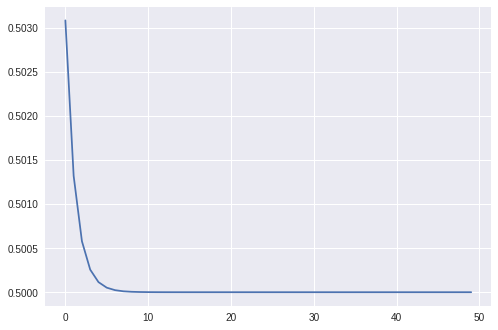

In [0]:
# Simple Perceptron : XOR
# Data setup
x_data = np.array([[0,0],[1,0],[1,1],[0,1]])
y_data = np.array([[0],[1],[0],[1]])

# Model setting
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.random_uniform([2,1],-1.,1.)) # -1에서 1 사이로 랜덤 2X1
b = tf.Variable(tf.zeros([1]))

L = tf.add(tf.matmul(X,W),b)
L = tf.nn.sigmoid(L)

# loss and optimizer definition
loss = nn.l2_loss(Y-L)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

# initialize and learn
init = tf.global_variables_initializer()

sess.run(init)

loss_step=[]

for i in range(5000): # 5000번 학습한다
  sess.run(train_op, feed_dict={X:x_data, Y:y_data})
  if (i+1)%100 == 0: # 100번 돌 때마다 출력한다
    temp_loss = sess.run(loss, feed_dict={X:x_data, Y:y_data})
    print(i+1, temp_loss)
    loss_step.append(temp_loss)
    
# 오차 그래프 : 약 50%
plt.plot(loss_step)

100 0.2329278
200 0.09590691
300 0.047121186
400 0.027708225
500 0.018528689
600 0.013458945
700 0.010341898
800 0.008278183
900 0.0068247775
1000 0.005774034
1100 0.0049686097
1200 0.004346919
1300 0.003846136
1400 0.0034398644
1500 0.0031047538
1600 0.0028218902
1700 0.0025838437
1800 0.0023788908
1900 0.0022013448
2000 0.0020463765
2100 0.0019103017
2200 0.0017891026
2300 0.0016813838
2400 0.0015850274
2500 0.0014980186
2600 0.0014192577
2700 0.0013480862
2800 0.0012828978
2900 0.001223114
3000 0.0011681512
3100 0.0011178268
3200 0.0010713069
3300 0.0010278673
3400 0.000987615
3500 0.0009503886
3600 0.0009155865
3700 0.0008829123
3800 0.0008524199
3900 0.0008237349
4000 0.0007967494
4100 0.0007714691
4200 0.00074754655
4300 0.0007249721
4400 0.00070360134
4500 0.0006834286
4600 0.0006641754
4700 0.0006460139
4800 0.0006287609
4900 0.00061219186
5000 0.00059652317


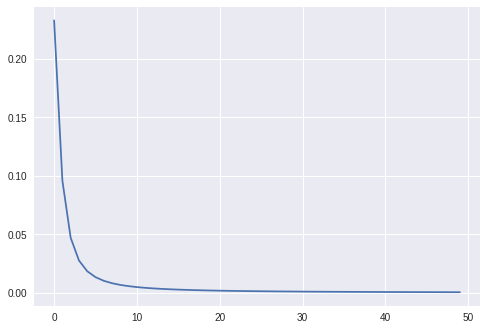

In [0]:
# Simple Multiple Layer Perceptron : XOR

# Data setup
x_data = np.array([[0,0],[1,0],[1,1],[0,1]])
y_data = np.array([[0],[1],[0],[1]])

# Model setting
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# 5개의 hidden node
W1 = tf.Variable(tf.random_uniform([2,5],-1.,1.)) # -1에서 1 사이로 랜덤 2X1
b1 = tf.Variable(tf.zeros([5]))

W2 = tf.Variable(tf.random_uniform([5,1],-1.,1.))
b2 = tf.Variable(tf.zeros([1]))

H = tf.nn.relu(tf.add(tf.matmul(X,W1),b1))

L = tf.nn.sigmoid(tf.add(tf.matmul(H,W2),b2))

# loss and optimizer definition
loss = nn.l2_loss(Y-L)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(loss)

# initialize and learn
init = tf.global_variables_initializer()

sess.run(init)

loss_step=[]

for i in range(5000): # 5000번 학습한다
  sess.run(train_op, feed_dict={X:x_data, Y:y_data})
  if (i+1)%100 == 0: # 100번 돌 때마다 출력한다
    temp_loss = sess.run(loss, feed_dict={X:x_data, Y:y_data})
    print(i+1, temp_loss)
    loss_step.append(temp_loss)
    
# 오차 그래프 
plt.plot(loss_step)

100 2.123731 2.5374217
200 1.8265884 2.2127337
300 1.5833195 1.9432406
400 1.3840042 1.7191331
500 1.2205797 1.5324045
600 1.0864828 1.3765057
700 0.976372 1.2460799
800 0.88588923 1.1367313
900 0.811475 1.0448468
1000 0.75021976 0.9674532
1100 0.6997483 0.9021052
1200 0.6581148 0.8467834
1300 0.62372816 0.7998213
1400 0.5952841 0.75983983
1500 0.57171535 0.72569877
1600 0.552147 0.69645226
1700 0.53586125 0.6713146
1800 0.5222702 0.6496334
1900 0.5108917 0.63086593
2000 0.50132936 0.6145585
2100 0.49325955 0.6003343
2200 0.48641527 0.5878767
2300 0.48057795 0.5769209
2400 0.47556815 0.5672451
2500 0.47123826 0.55866206
2600 0.46746776 0.5510149
2700 0.4641569 0.54417104
2800 0.46122456 0.53801835
2900 0.4586034 0.5324619
3000 0.45623887 0.5274211
3100 0.45408517 0.5228265
3200 0.45210585 0.51862085
3300 0.4502698 0.5147534
3400 0.44855255 0.5111814
3500 0.44693342 0.507868
3600 0.44539514 0.504782
3700 0.44392428 0.5018957
3800 0.44250906 0.49918523
3900 0.44114095 0.4966307
4000 0.43

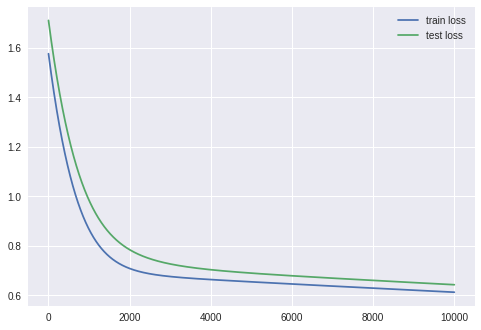

In [0]:
# Iris Data Regression
# 실수 3개를 입력으로 주고 실수 1개를 출력으로 주는 Regression
from sklearn import datasets

# data setup
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data]) # input
y_vals = np.array([x[3] for x in iris.data]) # target_output

# 80% for training, 20% for test
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

# input data normalization (from -1 to 1)
def normalize_cols(m):
  col_max = m.max(axis=0)
  col_min = m.min(axis=0)
  return (m-col_min)/(col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

# model setup
x_data = tf.placeholder(shape=[None,3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

H_nodes = 10

W1 = tf.Variable(tf.random_normal(shape=[3,H_nodes]))
b1 = tf.Variable(tf.random_normal(shape=[H_nodes]))

W2 = tf.Variable(tf.random_normal(shape=[H_nodes,1]))
b2 = tf.Variable(tf.random_normal(shape=[1]))

H_out = tf.nn.sigmoid(tf.add(tf.matmul(x_data,W1),b1))
L_out = tf.nn.relu(tf.add(tf.matmul(H_out,W2),b2))

# loss and optimizer definition
loss = tf.reduce_mean(tf.square(y_target - L_out))

optimizer = tf.train.GradientDescentOptimizer(0.0001)
train_op = optimizer.minimize(loss)

# Running session
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

loss_vec = []
test_loss = []
for i in range(10000):
  sess.run(train_op, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
  
  temp_loss = sess.run(loss, feed_dict={x_data:x_vals_train, y_target:np.transpose([y_vals_train])})
  loss_vec.append(np.sqrt(temp_loss))
  
  test_temp_loss = sess.run(loss, feed_dict={x_data:x_vals_test, y_target:np.transpose([y_vals_test])})
  test_loss.append(np.sqrt(test_temp_loss))
  
  if (i+1)%100 == 0:
    print(i+1, temp_loss, test_temp_loss)
    
plt.plot(loss_vec, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()